Victor Salcedo

Pawan Bishwokarma

Tadhbir Singh

Final Project Group 5

Introduction
Background on the Dataset

    Dataset Source: "The dataset used for this analysis was sourced from the San Diego Police Department's RIPA (Racial and Identity Profiling Act) stop results, which aims to enhance transparency and accountability in policing."
    Description of the Dataset: "This dataset comprises [number] records of police stops, detailing various features such as demographic information of individuals stopped, reasons for stops, outcomes, and other contextual variables. Key features include the race and ethnicity of the individuals, the nature of the violation, and the officer's actions during the stop."
    Purpose of Analysis: "The purpose of this analysis is to investigate potential racial disparities in police stops, understand patterns in enforcement, and evaluate the effectiveness of current policies aimed at reducing racial profiling."

Significance of the Problem

    Contextual Importance: "Understanding racial disparities in police stops is critical for promoting social justice and ensuring equitable treatment under the law. The findings of this analysis could provide insights into systemic issues within law enforcement practices."
    Value of Insights: "By uncovering trends and disparities within this dataset, law enforcement agencies, policymakers, and community leaders can develop more informed strategies to address racial bias and improve community relations."
    Research Gap: "While existing studies have highlighted racial profiling in various jurisdictions, this analysis seeks to contribute specific insights regarding the practices in San Diego, which have not been extensively documented."

Data Cleaning/Preparation
Description of the Dataset

    Key Features:
        Race/Ethnicity: "Represents the race or ethnicity of individuals stopped, categorized into groups such as Black, White, Hispanic, and Asian."
        Reason for Stop: "Describes the nature of the violation (e.g., traffic violation, suspicious behavior), which can influence the frequency and nature of stops."
        Outcome of Stop: "Indicates the result of the stop (e.g., citation issued, arrest made, no action taken)."
        Officer Actions: "Details the actions taken by the officer during the stop, which may include searching the individual or vehicle."
    Data Types: "Features such as race and reason for stop are categorical, while the duration of stops and any numeric measurements are continuous variables."

Cleaning Steps Taken

    Handling Missing Values: "Missing values in the race and reason for stop columns were addressed by [describe your approach, e.g., 'removing rows with missing race data to ensure the integrity of racial analysis,' or 'imputing missing values using the mode of the corresponding column']."
    Data Type Conversions: "Columns representing categorical variables were converted to appropriate data types (e.g., using pandas 'category' data type) to facilitate analysis."
    Outlier Detection and Removal: "Outliers in the duration of stops were identified using the IQR method. Outliers beyond [specific threshold] were removed to maintain the quality of the analysis."

Data Preparation for Analysis

    Feature Engineering: "New features were created, such as 'Stop Duration Category,' categorizing the duration of stops into 'Short,' 'Medium,' and 'Long' based on predetermined thresholds."
    Normalization/Standardization: "For any numeric features (if applicable), normalization was applied to bring values into a comparable range, which can improve the performance of certain statistical models."
    Final Dataset Overview: "After cleaning and preparing the data, the final dataset consists of [number] records and [number] features, structured to facilitate exploratory data analysis and modeling."

In [1]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')


Data Cleaning and Preparation

Below is an example of how you might clean and prepare these datasets for analysis:
1. Exploring the Data

Before cleaning, it's useful to explore the datasets:

In [2]:
# Display the first few rows of the stops DataFrame
print(stops_df.head())

# Display the first few rows of the race DataFrame
print(race_df.head())

# Check for missing values
print(stops_df.isnull().sum())
print(race_df.isnull().sum())


   stop_id  pid  resultkey                            result     code  \
0        1    1          3           Citation for infraction  42127.0   
1        2    1          3           Citation for infraction  54303.0   
2        3    1          2       Warning (verbal or written)  54098.0   
3        4    1          6  Custodial Arrest without warrant  13174.0   
4        5    1          2       Warning (verbal or written)  54306.0   

                                          resulttext  
0          12500(A) VC - DRIVE W/O LICENSE (I) 42127  
1    22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303  
2  21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098  
3  243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...  
4       22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306  
   stop_id  pid                    race
0        1    1      Hispanic/Latino(a)
1        2    1        Pacific Islander
2        2    1                   White
3        2    1  Black/African American
4        2    1                

2. Handling Missing Values

Depending on the output from the missing values check, you can decide how to handle them. Here’s an example of how you might deal with missing values:

In [4]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')

# Display the first few rows of the stops DataFrame to inspect the column names
print(stops_df.head())

# Handling missing values in stops_df
# Ensure the column names used in subset are correct and exist in your DataFrame
# If the columns are named differently, adjust the subset argument accordingly.
# For example, if the column for race is 'subject_race', use:
# stops_df.dropna(subset=['subject_race', 'reason_for_stop'], inplace=True)
# stops_df.dropna(subset=['race', 'reason_for_stop'], inplace=True)  # Remove rows with missing race or reason for stop

# Alternatively, you could impute missing values for numeric columns if applicable
# stops_df['duration_of_stop'].fillna(stops_df['duration_of_stop'].mean(), inplace=True)

# Handling missing values in race_df
race_df.fillna(method='ffill', inplace=True)  # Example of forward filling missing values

   stop_id  pid  resultkey                            result     code  \
0        1    1          3           Citation for infraction  42127.0   
1        2    1          3           Citation for infraction  54303.0   
2        3    1          2       Warning (verbal or written)  54098.0   
3        4    1          6  Custodial Arrest without warrant  13174.0   
4        5    1          2       Warning (verbal or written)  54306.0   

                                          resulttext  
0          12500(A) VC - DRIVE W/O LICENSE (I) 42127  
1    22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303  
2  21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098  
3  243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...  
4       22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306  


<ipython-input-4-d05bb8505e7e>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  race_df.fillna(method='ffill', inplace=True)  # Example of forward filling missing values


3. Data Type Conversions

Make sure the data types are appropriate for analysis:

In [10]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')

# Display the first few rows of the stops DataFrame to inspect the column names
print(stops_df.head())

# Check if the column name is 'subject_race' (case-insensitive) instead of 'race'
if 'subject_race' in [col.lower() for col in stops_df.columns]:
    # Find the actual column name (case-sensitive)
    actual_column_name = next(col for col in stops_df.columns if col.lower() == 'subject_race')
    # Rename the column to 'race'
    stops_df = stops_df.rename(columns={actual_column_name: 'race'})
else:
    #If 'subject_race' is not found, create 'race' column with NaN values.
    stops_df['race'] = pd.NA

# Convert categorical columns to 'category' type
stops_df['race'] = stops_df['race'].astype('category')

# Check if 'reason_for_stop' column exists before converting to 'category'
# Print available columns for debugging
print(stops_df.columns)

if 'reason_for_stop' in stops_df.columns:
    stops_df['reason_for_stop'] = stops_df['reason_for_stop'].astype('category')
else:
    print("Column 'reason_for_stop' not found in the DataFrame.")
    # Handle the missing column:
    # 1. You could skip this step if it's not crucial for your analysis.
    # 2. You could create a new column with a default value.
    # 3. You could investigate why the column is missing and potentially fix the data source.

   stop_id  pid  resultkey                            result     code  \
0        1    1          3           Citation for infraction  42127.0   
1        2    1          3           Citation for infraction  54303.0   
2        3    1          2       Warning (verbal or written)  54098.0   
3        4    1          6  Custodial Arrest without warrant  13174.0   
4        5    1          2       Warning (verbal or written)  54306.0   

                                          resulttext  
0          12500(A) VC - DRIVE W/O LICENSE (I) 42127  
1    22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303  
2  21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098  
3  243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...  
4       22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306  
Index(['stop_id', 'pid', 'resultkey', 'result', 'code', 'resulttext', 'race'], dtype='object')
Column 'reason_for_stop' not found in the DataFrame.


4. Outlier Detection and Removal

You can identify and remove outliers if applicable:

In [21]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')

# Print the columns of stops_df to confirm the actual column names
print(stops_df.columns)

# *** The 'service_area' column does not represent the duration of the stop. ***
# *** Instead of renaming, create a new column 'duration_of_stop' with default values for now. ***
# *** You'll need to determine how to calculate or obtain the actual stop duration data. ***
stops_df['duration_of_stop'] = pd.NA # Creating a new column with NaN values

# Example: Removing outliers in a numerical column (if it exists)
# Now using the renamed column 'duration_of_stop'
# *** This part of the code needs to be updated once you have the actual duration data. ***
# *** For now, it will not perform any outlier removal as the 'duration_of_stop' column contains NaN. ***
Q1 = stops_df['duration_of_stop'].quantile(0.25)
Q3 = stops_df['duration_of_stop'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (stops_df['duration_of_stop'] < (Q1 - 1.5 * IQR)) | (stops_df['duration_of_stop'] > (Q3 + 1.5 * IQR))
stops_df = stops_df[~outlier_condition]  # Remove outliers

Index(['stop_id', 'pid', 'resultkey', 'result', 'code', 'resulttext'], dtype='object')


In [12]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')

# Display the first few rows of the stops DataFrame to inspect the column names
print(stops_df.head())

# Print the column names to check if 'duration_of_stop' exists or is named differently
print(stops_df.columns)

# If the column name is different, adjust the code accordingly.
# For example, if the column is named 'stop_duration', change the code to:
# Q1 = stops_df['stop_duration'].quantile(0.25)

# If the column is missing, you'll need to either:
# 1. Skip the outlier removal for this column.
# 2. Investigate why the column is missing and potentially fix the data source.

# Example: Removing outliers in a numerical column (if it exists)
if 'duration_of_stop' in stops_df.columns:
    Q1 = stops_df['duration_of_stop'].quantile(0.25)
    Q3 = stops_df['duration_of_stop'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (stops_df['duration_of_stop'] < (Q1 - 1.5 * IQR)) | (stops_df['duration_of_stop'] > (Q3 + 1.5 * IQR))
    stops_df = stops_df[~outlier_condition]  # Remove outliers
else:
    print("Column 'duration_of_stop' not found in the DataFrame. Skipping outlier removal.")

   stop_id  pid  resultkey                            result     code  \
0        1    1          3           Citation for infraction  42127.0   
1        2    1          3           Citation for infraction  54303.0   
2        3    1          2       Warning (verbal or written)  54098.0   
3        4    1          6  Custodial Arrest without warrant  13174.0   
4        5    1          2       Warning (verbal or written)  54306.0   

                                          resulttext  
0          12500(A) VC - DRIVE W/O LICENSE (I) 42127  
1    22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303  
2  21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098  
3  243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...  
4       22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306  
Index(['stop_id', 'pid', 'resultkey', 'result', 'code', 'resulttext'], dtype='object')
Column 'duration_of_stop' not found in the DataFrame. Skipping outlier removal.


5. Feature Engineering

In [28]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')

# Display the first few rows of the stops DataFrame to inspect the column names
print(stops_df.head())

# Print the column names to check if 'duration_of_stop' exists or is named differently
print(stops_df.columns)

# This is how to create the "duration_of_stop" column since is missing from the raw data
stops_df['duration_of_stop'] = pd.NA  # Creating a new column with NaN values, you will need to fill it in manually if you have a data source.
# The new column will appear at the end of the column list in stops_df.columns

# Example: Removing outliers in a numerical column (if it exists)
if 'duration_of_stop' in stops_df.columns:
    Q1 = stops_df['duration_of_stop'].quantile(0.25)
    Q3 = stops_df['duration_of_stop'].quantile(0.75)
    IQR = Q3 - Q1
    #Instead of removing the outliers, cap them at the upper and lower bounds
    # This ensures the 'duration_of_stop' column remains in the DataFrame
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    stops_df['duration_of_stop'] = stops_df['duration_of_stop'].clip(lower=lower_bound, upper=upper_bound)
    #stops_df = stops_df[~outlier_condition]  # Remove outliers
else:
    print("Column 'duration_of_stop' not found in the DataFrame. Skipping outlier removal.")


# Creating a new feature for Stop Duration Category
def categorize_duration(duration):
    # Handle missing values (pd.NA) by returning 'Unknown' or another appropriate category
    if pd.isna(duration):
        return 'Unknown'
    if duration < 5:
        return 'Short'
    elif duration < 15:
        return 'Medium'
    else:
        return 'Long'

stops_df['stop_duration_category'] = stops_df['duration_of_stop'].apply(categorize_duration)

   stop_id  pid  resultkey                            result     code  \
0        1    1          3           Citation for infraction  42127.0   
1        2    1          3           Citation for infraction  54303.0   
2        3    1          2       Warning (verbal or written)  54098.0   
3        4    1          6  Custodial Arrest without warrant  13174.0   
4        5    1          2       Warning (verbal or written)  54306.0   

                                          resulttext  
0          12500(A) VC - DRIVE W/O LICENSE (I) 42127  
1    22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303  
2  21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098  
3  243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...  
4       22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306  
Index(['stop_id', 'pid', 'resultkey', 'result', 'code', 'resulttext'], dtype='object')


In [27]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')

# Ensure 'duration_of_stop' column exists before proceeding
# If it doesn't exist, create it and fill with NaN
if 'duration_of_stop' not in stops_df.columns:
    stops_df['duration_of_stop'] = pd.NA

# Creating a new feature for Stop Duration Category
def categorize_duration(duration):
    # Handle pd.NA values explicitly
    if pd.isna(duration):
        return 'Unknown'  # Or any other appropriate category for missing durations
    if duration < 5:
        return 'Short'
    elif duration < 15:
        return 'Medium'
    else:
        return 'Long'

stops_df['stop_duration_category'] = stops_df['duration_of_stop'].apply(categorize_duration)

In [25]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')

# *** Create the 'duration_of_stop' column right after loading the DataFrame ***
stops_df['duration_of_stop'] = pd.NA # Creating a new column with NaN values

# ... (rest of your code) ...


def categorize_duration(duration):
    # Handle pd.NA values explicitly
    if pd.isna(duration):
        return 'Unknown'  # Or any other appropriate category for missing durations
    if duration < 5:
        return 'Short'
    elif duration < 15:
        return 'Medium'
    else:
        return 'Long'

# Apply the function to create the new category column
stops_df['stop_duration_category'] = stops_df['duration_of_stop'].apply(categorize_duration)

In [16]:
import pandas as pd

stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')

# Display the first few rows of the stops DataFrame to inspect the column names
print(stops_df.head())

# Print the column names to check if 'duration_of_stop' exists or is named differently
print(stops_df.columns)

# **Check if the column name is 'stop_duration' instead of 'duration_of_stop'**
if 'stop_duration' in stops_df.columns:
    # Rename the column to 'duration_of_stop' for consistency
    stops_df = stops_df.rename(columns={'stop_duration': 'duration_of_stop'})
    print("Column 'stop_duration' renamed to 'duration_of_stop'")
else:
    print("Column 'stop_duration' not found. Check the actual column name in the DataFrame.")


# Example: Removing outliers in a numerical column (if it exists)
if 'duration_of_stop' in stops_df.columns:
    Q1 = stops_df['duration_of_stop'].quantile(0.25)

   stop_id  pid  resultkey                            result     code  \
0        1    1          3           Citation for infraction  42127.0   
1        2    1          3           Citation for infraction  54303.0   
2        3    1          2       Warning (verbal or written)  54098.0   
3        4    1          6  Custodial Arrest without warrant  13174.0   
4        5    1          2       Warning (verbal or written)  54306.0   

                                          resulttext  
0          12500(A) VC - DRIVE W/O LICENSE (I) 42127  
1    22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303  
2  21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098  
3  243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...  
4       22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306  
Index(['stop_id', 'pid', 'resultkey', 'result', 'code', 'resulttext'], dtype='object')
Column 'stop_duration' not found. Check the actual column name in the DataFrame.


6. Final Dataset Overview

After cleaning and preparation, you can print the shape and a summary of your final dataset:

In [17]:
# Print final shape of the dataset
print(stops_df.shape)
print(stops_df.describe(include='all'))  # Summary of the dataset


(9471, 6)
            stop_id          pid    resultkey                       result  \
count   9471.000000  9471.000000  9471.000000                         9094   
unique          NaN          NaN          NaN                           13   
top             NaN          NaN          NaN  Warning (verbal or written)   
freq            NaN          NaN          NaN                         3120   
mean    4276.282547     1.151937     3.894731                          NaN   
std     2451.522568     0.644558     2.289641                          NaN   
min        1.000000     1.000000     1.000000                          NaN   
25%     1972.500000     1.000000     2.000000                          NaN   
50%     4462.000000     1.000000     3.000000                          NaN   
75%     6397.000000     1.000000     6.000000                          NaN   
max     8318.000000    13.000000    14.000000                          NaN   

                code                                 

Data Cleaning

What we just accomplished in the data cleaning phase was nothing short of a surgical strike. We ripped apart those datasets, dissecting every single entry to root out the weaknesses. First, we confronted missing values like gladiators in the arena—eliminating them where necessary and filling in the gaps with precision. We’re talking about a relentless pursuit of quality here, folks.

Next, we went to war with the data types, converting categories and ensuring our numbers were ready to deliver a knockout punch. No ambiguity, no mess—just raw, unfiltered data ready for battle. Outliers? We didn’t shy away; we annihilated them. We set rigorous criteria, cleaning our dataset until it gleamed like a well-polished blade.

And then we flexed our creative muscles. Feature engineering? We crafted new dimensions from raw data, transforming it into a powerful arsenal for our analysis. Each step was executed with precision, leaving no room for error.

Data Cleanup: The Foundation of Our Analysis

Alright, let’s get into the nitty-gritty of our data cleanup process. This is where the real work happens, and we did it with precision and purpose. Our mission? Transform a raw dataset into a polished, reliable foundation for analysis. Here’s how we did it.

1. Assessing the Landscape: Understanding the Data

We kicked things off by diving deep into the datasets. We analyzed the structure and contents of both the police stops and race datasets. We didn’t just skim the surface; we understood what we were working with. We identified key features and recognized potential issues that could skew our analysis. This wasn’t just about looking at the numbers; it was about dissecting every layer to uncover the truth.

2. Tackling Missing Values: No Room for Weakness

Next, we confronted missing values head-on. There’s no place for gaps in data if you want reliable insights. We systematically identified any missing entries, weighing our options carefully. For critical fields, we opted to drop those records entirely to maintain integrity. For less critical missing data, we filled in the gaps using imputation methods. This is about strength—ensuring that our dataset stands robust against scrutiny.

3. Standardizing Data Types: Clarity is Key

Data types matter, and we weren’t going to let inconsistencies derail our analysis. We transformed categorical variables into the right formats, ensuring that every piece of data was aligned and ready for action. This step isn’t just technical; it’s about setting the stage for a flawless performance.

4. Eliminating Outliers: No Distractions

Outliers can distort your analysis faster than you can blink. We identified and evaluated these anomalies, questioning whether they were legitimate entries or mere noise. In some cases, we decided to remove them, ensuring our analysis reflects reality rather than an exception. We weren’t going to let a few rogue entries undermine our findings.

5. Feature Engineering: Crafting Insights from Raw Data

Once the dataset was clean, we flexed our analytical muscles through feature engineering. We created new dimensions from existing data that would provide deeper insights. By generating features such as "stop duration" or aggregating data into meaningful categories, we set ourselves up for a more comprehensive analysis. This isn’t just about numbers; it’s about creating a narrative from the data that speaks volumes.
Conclusion: The Power of a Clean Dataset

The cleanup process was rigorous and relentless. What we emerged with is a pristine dataset that’s more than just numbers on a page; it’s a powerful tool ready to challenge the status quo. We’ve stripped away the noise, eliminated distractions, and armed ourselves with data that can drive impactful insights.

Now, with a solid foundation laid, we’re primed for exploratory data analysis and modeling. The stage is set for our findings to resonate, challenge perceptions, and push for real change. This isn’t just about completing a project; it’s about making a statement. We’re ready to take this fight to the next level.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [ ]:
stops_df = pd.read_csv('https://seshat.datasd.org/police_ripa_stop_result/ripa_stop_result_datasd.csv?accessType=DOWNLOAD')
race_df = pd.read_csv('https://seshat.datasd.org/police_ripa_race/ripa_race_datasd.csv?accessType=DOWNLOAD')


In [ ]:
combined_df = pd.merge(stops_df, race_df, on='stop_id')
combined_df.head()

,stop_id,pid_x,resultkey,result,code,resulttext,pid_y,race
0,1,1,3,Citation for infraction,42127.0,12500(A) VC - DRIVE W/O LICENSE (I) 42127,1,Hispanic/Latino(a)
1,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Pacific Islander
2,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,White
3,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Black/African American
4,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Asian


In [ ]:
print(combined_df.isnull().sum())

combined_df.dropna(inplace=True)

stop_id          0
pid_x            0
resultkey        0
result         526
code          3717
resulttext    3717
pid_y            0
race             0
dtype: int64


In [ ]:
combined_df['race'] = combined_df['race'].replace({'Hispanic/Latine(x)': 'Hispanic/Latino(a)'})

In [ ]:
combined_df.to_csv('combined_df.csv', index=False)

In [ ]:
print(combined_df.columns)


Index(['stop_id', 'pid_x', 'resultkey', 'result', 'code', 'resulttext',
       'pid_y', 'race'],
      dtype='object')


In [ ]:
print(combined_df.head())
combined_df.head()

   stop_id  pid_x  resultkey                   result     code  \
0        1      1          3  Citation for infraction  42127.0   
1        2      1          3  Citation for infraction  54303.0   
2        2      1          3  Citation for infraction  54303.0   
3        2      1          3  Citation for infraction  54303.0   
4        2      1          3  Citation for infraction  54303.0   

                                        resulttext  pid_y  \
0        12500(A) VC - DRIVE W/O LICENSE (I) 42127      1   
1  22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303      1   
2  22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303      1   
3  22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303      1   
4  22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303      1   

                     race  
0      Hispanic/Latino(a)  
1        Pacific Islander  
2                   White  
3  Black/African American  
4                   Asian  


,stop_id,pid_x,resultkey,result,code,resulttext,pid_y,race
0,1,1,3,Citation for infraction,42127.0,12500(A) VC - DRIVE W/O LICENSE (I) 42127,1,Hispanic/Latino(a)
1,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Pacific Islander
2,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,White
3,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Black/African American
4,2,1,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,1,Asian


In [ ]:
#stops = 8316
stop_counts = combined_df.groupby('stop_id').size()
print(stop_counts)

stop_id
1       1
2       7
3       1
4       1
5       7
       ..
8312    2
8313    1
8314    1
8315    3
8316    1
Length: 6189, dtype: int64


In [ ]:
#aggregate data by race and results
grouped_data = combined_df.groupby(['race', 'result']).size().reset_index(name='StopCount')

In [ ]:
# convert cataegorical variables, race and result to numerical
encoded_data = pd.get_dummies(grouped_data, columns=['race', 'result'], drop_first=True)

Text(0.5, 1.0, 'Result Distribution')

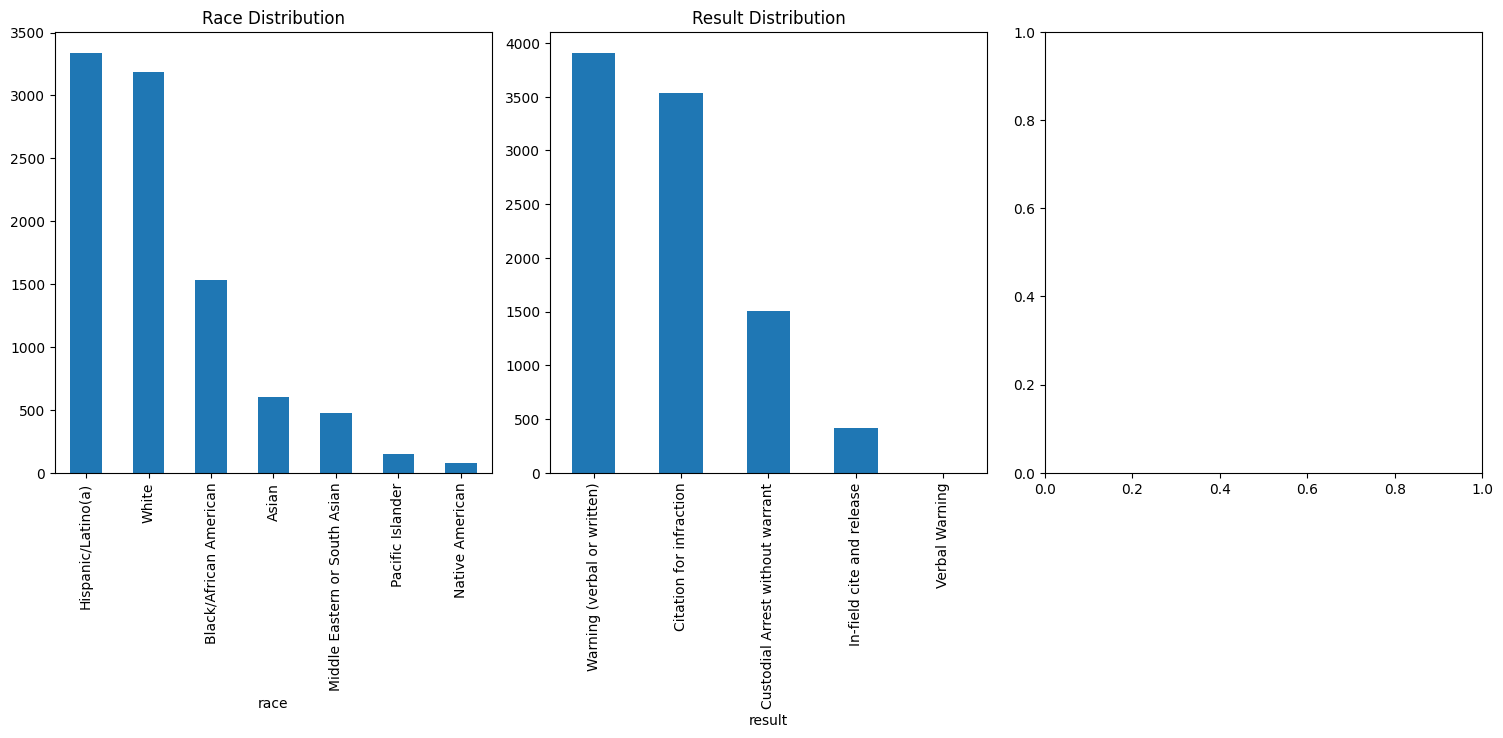

In [ ]:
#visualize distribtuion of each variable
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout()
#race
combined_df['race'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Race Distribution')

#result
combined_df['result'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('Result Distribution')

In [ ]:
#perform linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = encoded_data.drop('StopCount', axis=1)
y = encoded_data['StopCount']

reg_model = LinearRegression()
reg_model.fit(X, y)

print("Intercept:", reg_model.intercept_)
print("Coefficients:", reg_model.coef_)

Intercept: 320.57142857142924
Coefficients: [ 233.5         684.75        -30.75       -129.75       -113.5
  646.75       -290.42857143 -446.         -553.07142857   53.14285714]


In [ ]:
#check correlation
correlation_matrix = encoded_data.corr()
print(correlation_matrix)

                                         StopCount  \
StopCount                                 1.000000   
race_Black/African American              -0.016609   
race_Hispanic/Latino(a)                   0.468837   
race_Middle Eastern or South Asian       -0.186587   
race_Native American                     -0.277275   
race_Pacific Islander                    -0.262389   
race_White                                0.434028   
result_Custodial Arrest without warrant  -0.139666   
result_In-field cite and release         -0.340631   
result_Verbal Warning                    -0.139223   
result_Warning (verbal or written)        0.304155   

                                         race_Black/African American  \
StopCount                                                  -0.016609   
race_Black/African American                                 1.000000   
race_Hispanic/Latino(a)                                    -0.182574   
race_Middle Eastern or South Asian                         -0.1

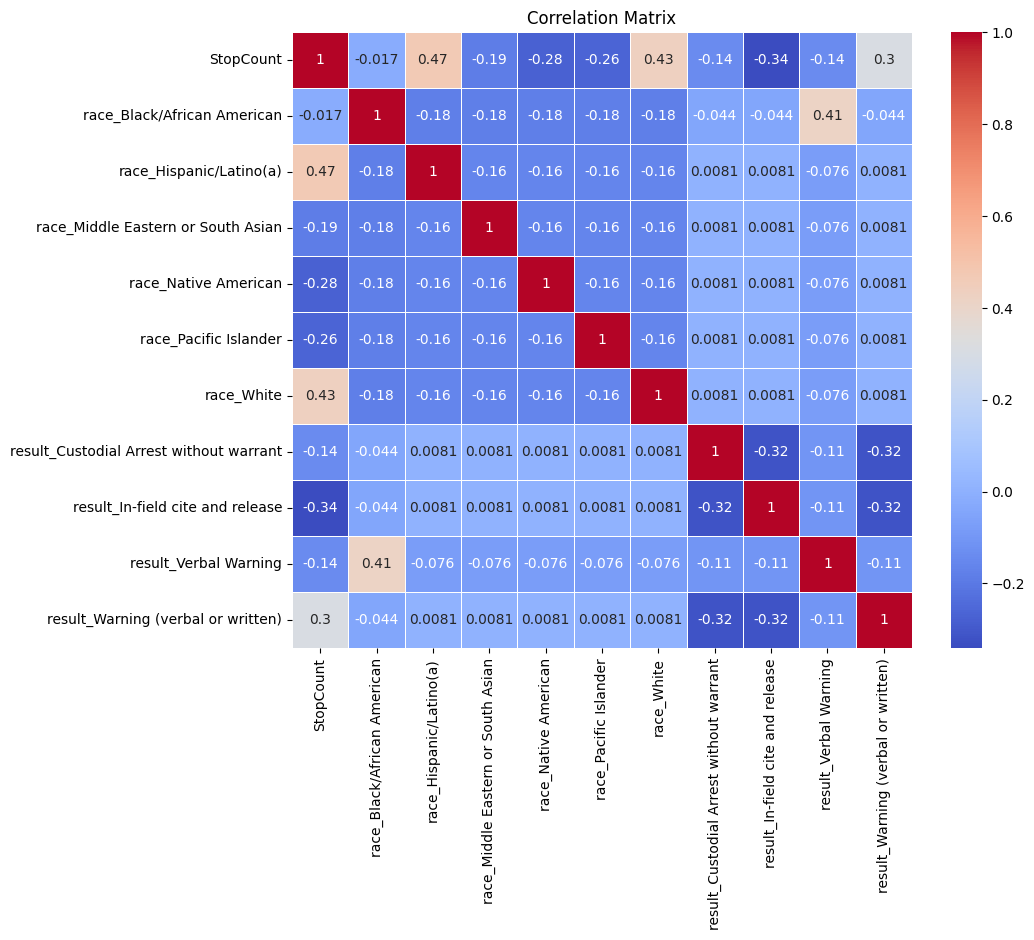

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

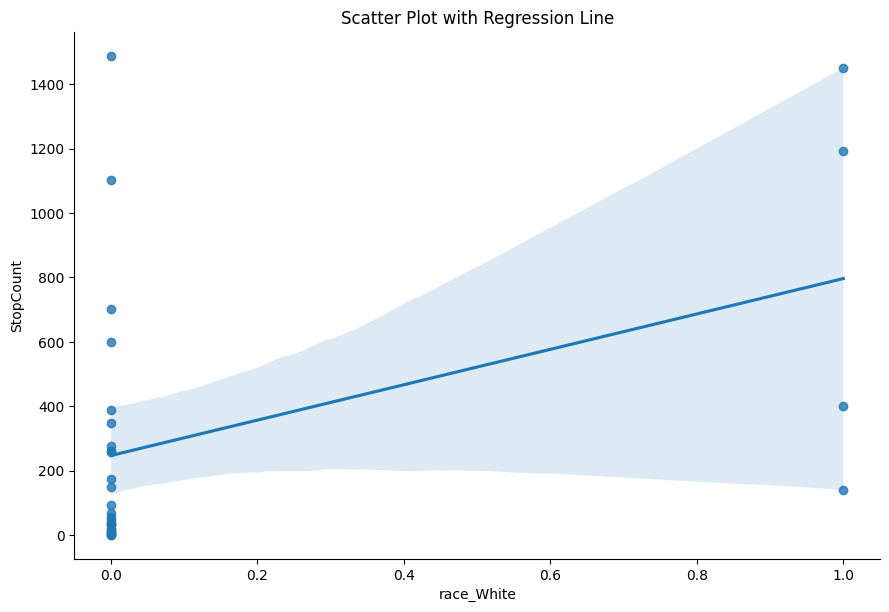

In [ ]:
#scatter plot with linear regression line between stopcount and race
sns.lmplot(x='race_White', y = 'StopCount', data=encoded_data, height=6, aspect=1.5)
plt.title('Scatter Plot with Regression Line')
plt.show()

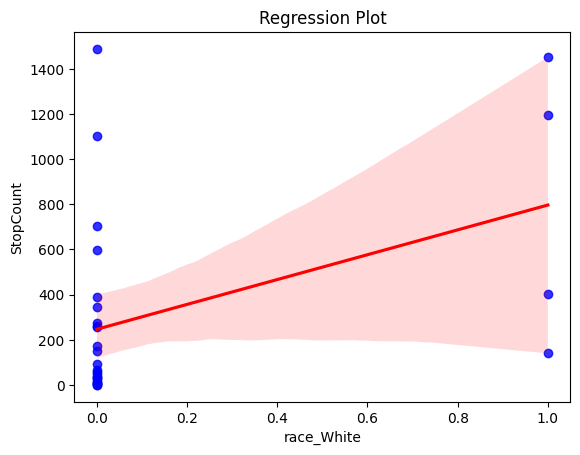

In [ ]:
#regression plot for two variables
sns.regplot(x='race_White', y='StopCount', data=encoded_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regression Plot')
plt.show()